### Data Set  –  diabetic 

Data Information:-
The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.


Attribute information :-

Pregnancies - Number of times pregnant

Glucose - Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure - Diastolic blood pressure (mm Hg)

SkinThickness - Triceps skin fold thickness (mm)

Insulin - 2-Hour serum insulin (mu U/ml)

BMI - Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction - Diabetes pedigree function

Age - Age (years)

Outcome - Class variable (0 or 1) 268 of 768 are 1, the others are 0


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
names = ['preg','plas','pres','skin','test','mass','pedi','age','class']

df = pd.read_csv('pima-indians-diabetes.data',names = names)
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


- **For PCA,data should be in nuemrical/quantitative form**

In [3]:
df.shape

(768, 9)

In [4]:
df.columns

Index(['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
preg     768 non-null int64
plas     768 non-null int64
pres     768 non-null int64
skin     768 non-null int64
test     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
#splitting into X and y
y = df['class']
X = df.drop('class',1)

In [8]:
from scipy.stats import zscore

#Appyling zscore and standardizing it
X_std = X.apply(zscore)
X_std.head()

,preg,plas,pres,skin,test,mass,pedi,age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [9]:
X_std.shape

(768, 8)

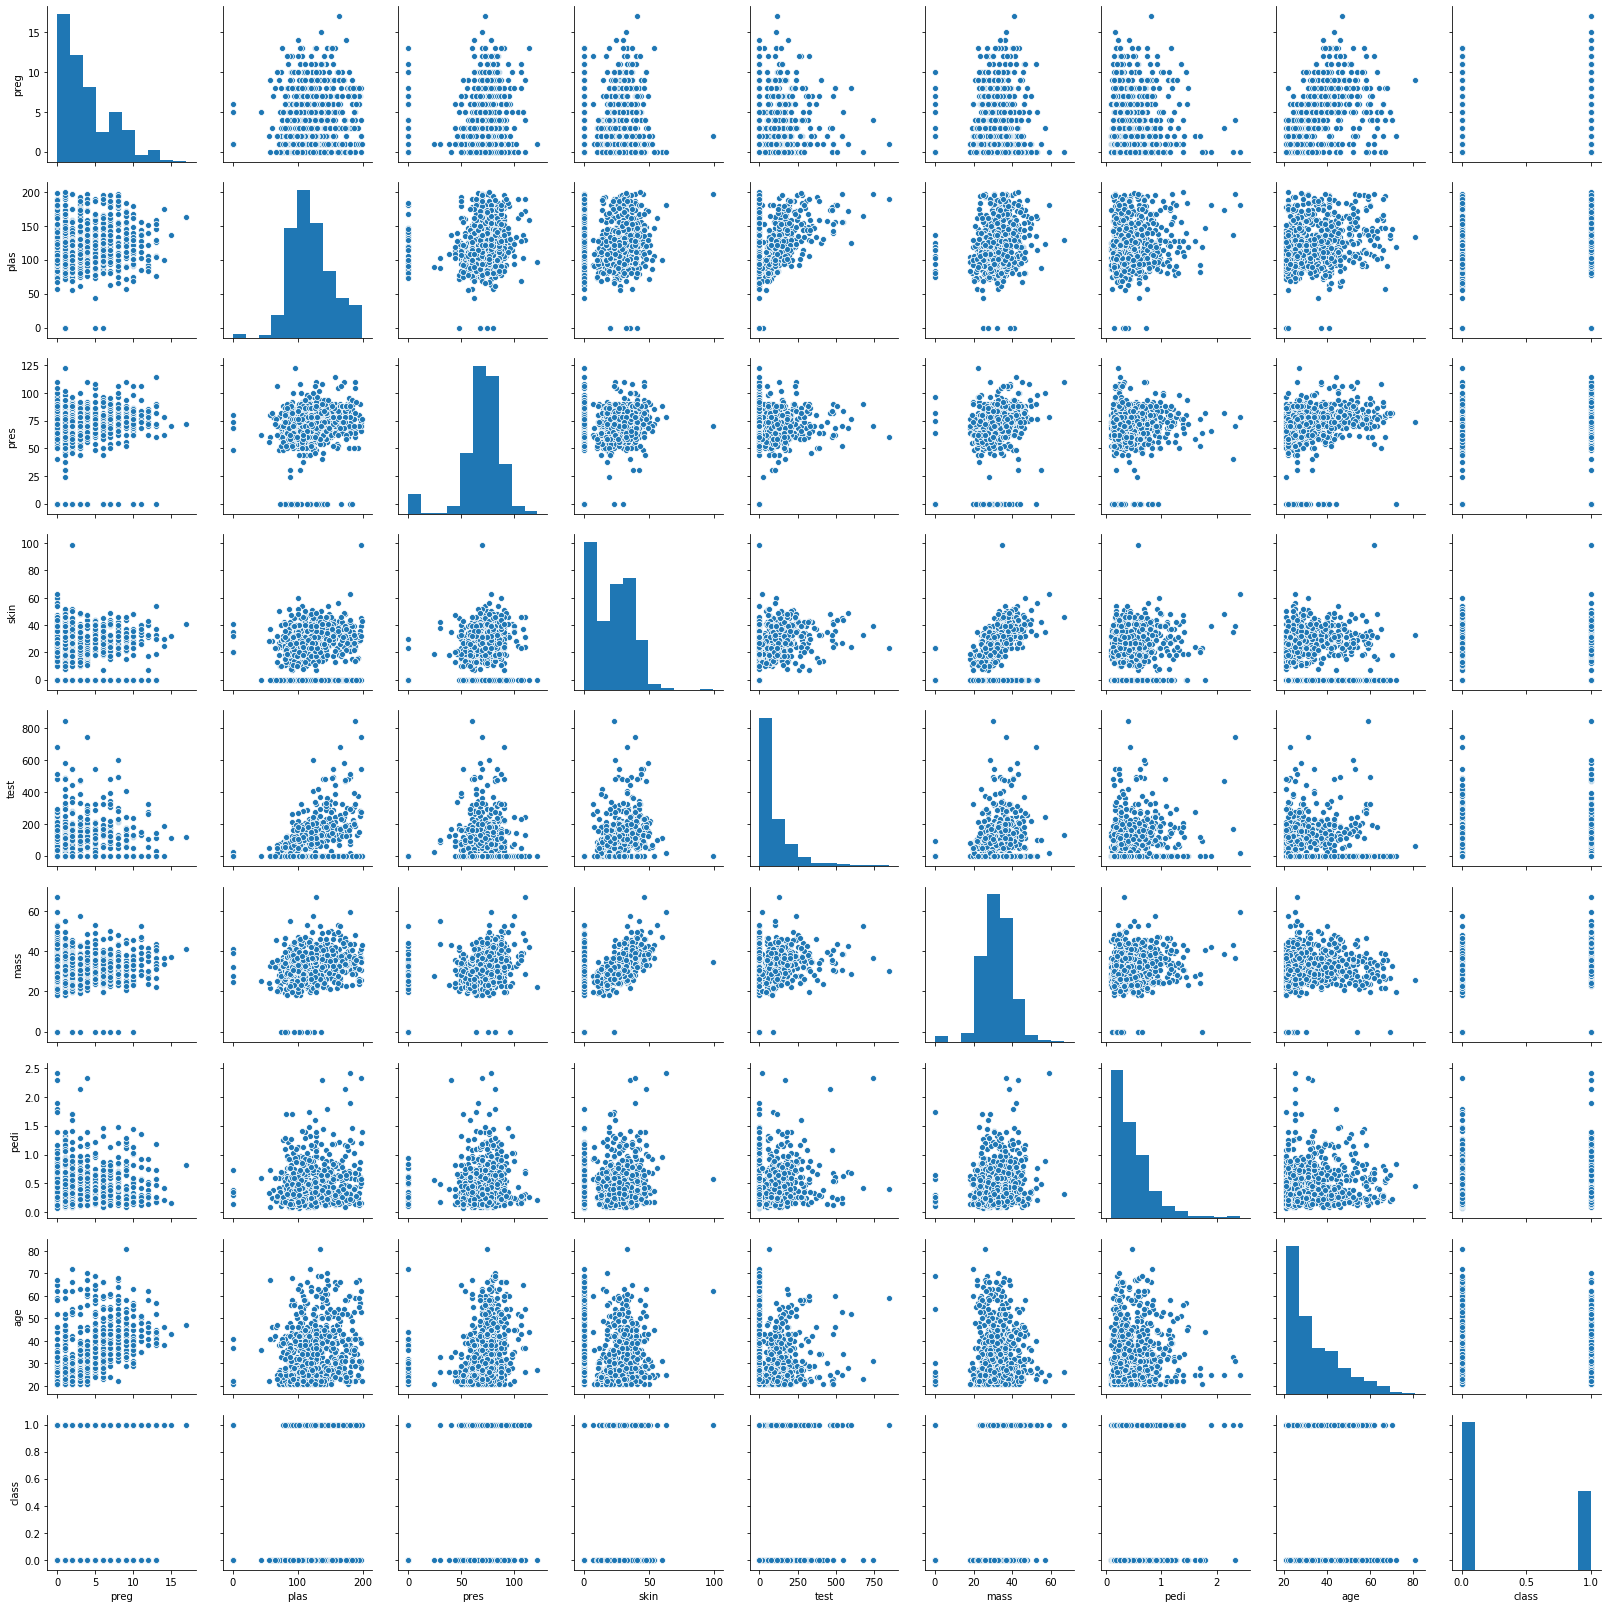

In [10]:
sns.pairplot(df)

- No collinearity exists

## Steps to perform PCA


**1.Calculate Covariance matrix
2.Calculate eigen values and eigen vectors
3.Pairing the eigen values and vectors
4.Sorting
5A - Transpose
6A - Dot product with features
7.Apply model
For dimensionality reduction
5B - Select the appropriate components
6B - Dot product**



In [11]:
#Step-1 Find the covariance matrix of X

#obtain covariance matrix for X
cov_matrix = np.cov(X_std,rowvar = False)  

#Note that covariance matrix is 8x8 since it has 8 features
print('Covariance matrix of X is',cov_matrix)

Covariance matrix of X is [[ 1.00130378  0.12962746  0.14146618 -0.08177826 -0.07363049  0.01770615
  -0.03356638  0.54505093]
 [ 0.12962746  1.00130378  0.15278853  0.05740263  0.33178913  0.2213593
   0.13751636  0.26385788]
 [ 0.14146618  0.15278853  1.00130378  0.2076409   0.08904933  0.2821727
   0.04131875  0.23984024]
 [-0.08177826  0.05740263  0.2076409   1.00130378  0.43735204  0.39308503
   0.18416737 -0.11411885]
 [-0.07363049  0.33178913  0.08904933  0.43735204  1.00130378  0.19811702
   0.18531222 -0.04221793]
 [ 0.01770615  0.2213593   0.2821727   0.39308503  0.19811702  1.00130378
   0.14083033  0.03628912]
 [-0.03356638  0.13751636  0.04131875  0.18416737  0.18531222  0.14083033
   1.00130378  0.03360507]
 [ 0.54505093  0.26385788  0.23984024 -0.11411885 -0.04221793  0.03628912
   0.03360507  1.00130378]]


- **np.cov by default works on rows**
- **But we want for our columns so rowvar = False**

In [12]:
#Step-2 Obtain eigen values and eigen vectors

eigenvalues,eigenvectors = np.linalg.eig(cov_matrix)   #linalg = linear algebra

#eigenvectors is 8x8 matrix
print('Eigenvectors of Cov(X)',eigenvectors)

#eigenvalues is a 8x1 vector
print('Eigenvalues of Cov(X)',eigenvalues)

Eigenvectors of Cov(X) [[-0.1284321  -0.59378583 -0.58879003  0.11784098 -0.19359817  0.47560573
  -0.08069115  0.01308692]
 [-0.39308257 -0.17402908 -0.06015291  0.45035526 -0.09416176 -0.46632804
   0.40432871 -0.46792282]
 [-0.36000261 -0.18389207 -0.19211793 -0.01129554  0.6341159  -0.32795306
  -0.05598649  0.53549442]
 [-0.43982428  0.33196534  0.28221253  0.5662838  -0.00958944  0.48786206
  -0.03797608  0.2376738 ]
 [-0.43502617  0.25078106 -0.13200992 -0.54862138  0.27065061  0.34693481
   0.34994376 -0.33670893]
 [-0.45194134  0.1009598  -0.03536644 -0.34151764 -0.68537218 -0.25320376
  -0.05364595  0.36186463]
 [-0.27061144  0.122069   -0.08609107 -0.00825873  0.08578409 -0.11981049
  -0.8336801  -0.43318905]
 [-0.19802707 -0.62058853  0.71208542 -0.21166198  0.03335717  0.10928996
  -0.0712006  -0.07524755]]
Eigenvalues of Cov(X) [2.09711056 1.73346726 0.42036353 0.40498938 0.68351839 0.76333832
 0.87667054 1.03097228]


- **Eigenvectos are basically matrix or vectors of vectors**
- **Eigenvalues are vectors of scalar values. They can be used to check the variance in our dataset**
- **Eigenvalues are 8 different values for eachof our feature so its a vector of 8 values,one for each features**
- **Whereas EigenVectors are vectorsof vectors. For every features we have a eigen vector so we are getting a size of 8x8.**
- **Eigenvector is a matrix of 8x8 where every row indicates one eigenvectors,one for each features

In [13]:
#Step 3: Sort eigenvalues in descending order

#Make a set of (eigenvalues,eigenvectors) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

#Sort the (eigenvalues,eigenvectors) pairs from highest to lowest with respect to eigen values
eig_pairs.sort()
eig_pairs.reverse()

#Extract the descending ordered eigenvalues and eigenvectors
#Separating eigen values and vectors after sorting
eigenvalues_sort = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigenvectors_sort = [eig_pairs[index][1] for index in range(len(eigenvectors))]

#Lets confirm our sorting worked,print out eigenvalues
print('EigenValues in descending order: \n%s'%eigenvalues_sort)

EigenValues in descending order: 
[2.097110557994525, 1.7334672594471252, 1.0309722810083828, 0.8766705419094806, 0.7633383156496728, 0.6835183858447279, 0.42036352804956806, 0.40498937781489913]


- **Pair the eigen value and vector and sort them in descending order wrt to eigenvalues**
- **Larger is the eigen values maximum is the variance captured by that component**
- **After sorting we have to deattach the eigenvalues and eigenvectors from each other**

-**Eigen values is used to check variance in our dataset**

In [14]:
#Calculating variance

tot = sum(eigenvalues)
var_explained = [(i/tot) for i in sorted(eigenvalues,reverse = True)]  #an array of variance explained by each
# (eigen vector... there will be 8 entries as there are 8 eigenvectors)

cum_var_exp = np.cumsum(var_explained) # an array of cumulative variance.There will be 8 entries with 8 th entry 
#cumulative reaching almost 100
print(cum_var_exp)

[0.26179749 0.47819876 0.60690249 0.71634362 0.81163667 0.89696522
 0.94944224 1.        ]


- **Cumulative will tell how many PC we should use**
- **First component variance = 0.26179**

- **First and second combiine is giving variance = 0.4781 and so on**

- **Except last 2 components our variance is good**

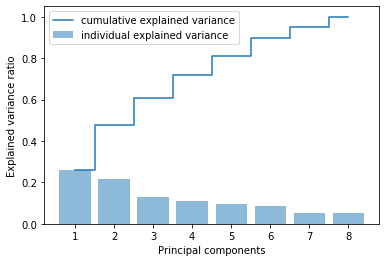

In [15]:
plt.bar(range (1,9), var_explained, alpha = 0.5, align = 'center', label='individual explained variance')
plt.step(range(1,9), cum_var_exp, where = 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend (loc = 'best')
plt.show()


#The plot shows that the first principal component alone accounts for 23 percent of the variance.
# ALso, we can see that the first two principal components combined explain almost 47 percent of the variance in the data.

In [16]:
#Step 4: Project data onto 2d

# Keep the first two principal components
# P_reduce is 8 x 2 matrix
P_reduce = np.array(eigenvectors_sort[0:8]).transpose()

# Let's project data onto 2D space 
# The projected data in 2D will be x 2 matrix
Proj_data_2D = np.dot(X_std,P_reduce)

- **As eigenvectors are in format of rows and we have to take product with X_std,so i have to transpose it first to columns so we can take a dot product with X_std**

- **P_reduce is eigen vectors in transpose format**

In [17]:
 X_std.shape, P_reduce.shape,Proj_data_2D.shape

((768, 8), (8, 8), (768, 8))

- **X_std and Proj_data_2D should be of same size ,if you are taking all principal components into consideration**

### Now PCA is completed

## Model Building using any Classification Model


In [28]:
#splitting using traintest split
from sklearn.model_selection import train_test_split

In [29]:
seed = 7
X_train, X_test, y_train, y_test = train_test_split(Proj_data_2D, y, test_size=0.30, random_state=seed)

In [23]:
#Building Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(accuracy_score(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.7748917748917749
[[130  35]
 [ 17  49]]
              precision    recall  f1-score   support

           0       0.88      0.79      0.83       165
           1       0.58      0.74      0.65        66

    accuracy                           0.77       231
   macro avg       0.73      0.77      0.74       231
weighted avg       0.80      0.77      0.78       231



In [26]:
#Building Randon Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train,y_train)

y_pred1 = rf.predict(X_test)

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(accuracy_score(y_pred1,y_test))
print(confusion_matrix(y_pred1,y_test))
print(classification_report(y_pred1,y_test))

0.7272727272727273
[[122  38]
 [ 25  46]]
              precision    recall  f1-score   support

           0       0.83      0.76      0.79       160
           1       0.55      0.65      0.59        71

    accuracy                           0.73       231
   macro avg       0.69      0.71      0.69       231
weighted avg       0.74      0.73      0.73       231



# How to solve using Sklearn's PCA

In [40]:
seed = 7
X_train, X_test, y_train, y_test = train_test_split(Proj_data_2D, y, test_size=0.30, random_state=seed)

In [41]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 7)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.26040842, 0.21302308, 0.12167194, 0.11609205, 0.10019493,
       0.08351094, 0.05715338])

In [42]:
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.30, random_state=seed)

In [43]:
# Again Building Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(accuracy_score(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.7748917748917749
[[130  35]
 [ 17  49]]
              precision    recall  f1-score   support

           0       0.88      0.79      0.83       165
           1       0.58      0.74      0.65        66

    accuracy                           0.77       231
   macro avg       0.73      0.77      0.74       231
weighted avg       0.80      0.77      0.78       231

